In [4]:
import pandas as pd
import numpy as np
# Set random seed
np.random.seed(42)
# Generate synthetic data
n_samples = 500
credit_score = np.random.randint(300, 850, n_samples)
annual_income = np.random.randint(20000, 120000, n_samples)
loan_amount = np.random.randint(1000, 50000, n_samples)
loan_term = np.random.choice([12, 24, 36, 48, 60], n_samples)
debt_to_income_ratio = np.round(np.random.uniform(0.1, 0.5, n_samples), 2)
age = np.random.randint(18, 70, n_samples)
# Simulate default based on conditions
defaulted = (credit_score < 600) | (debt_to_income_ratio > 0.4) |(annual_income < 30000)
defaulted = defaulted.astype(int)
# Create a DataFrame
data = pd.DataFrame({
 'Credit_Score': credit_score,
 'Annual_Income': annual_income,
 'Loan_Amount': loan_amount,
 'Loan_Term': loan_term,
 'Debt_to_Income_Ratio': debt_to_income_ratio,
 'Age': age,
 'Defaulted': defaulted
})
# Save to CSV
data.to_csv('loan_data.csv', index=False)
print("Synthetic dataset saved as 'loan_data.csv'.")

Synthetic dataset saved as 'loan_data.csv'.


In [29]:
df = pd.read_csv('loan_data.csv')
print(f'head:\n{df.head()}')
print(f'is null? {df.isnull().sum().sum()}')
print(f'describe:\n{df.describe()}')

head:
   Credit_Score  Annual_Income  Loan_Amount  Loan_Term  Debt_to_Income_Ratio  \
0           402          37640        10524         36                  0.46   
1           735          72528        32880         60                  0.41   
2           570          58413        40224         24                  0.32   
3           406          72638        37980         48                  0.20   
4           371          72736        33409         24                  0.22   

   Age  Defaulted  
0   56          1  
1   39          1  
2   29          1  
3   41          1  
4   64          1  
is null? 0
describe:
       Credit_Score  Annual_Income   Loan_Amount   Loan_Term  \
count    500.000000     500.000000    500.000000  500.000000   
mean     567.410000   66070.038000  25780.972000   36.360000   
std      157.986015   28975.413408  13952.750281   17.060026   
min      300.000000   20055.000000   1060.000000   12.000000   
25%      430.000000   39911.750000  13784.250000   2

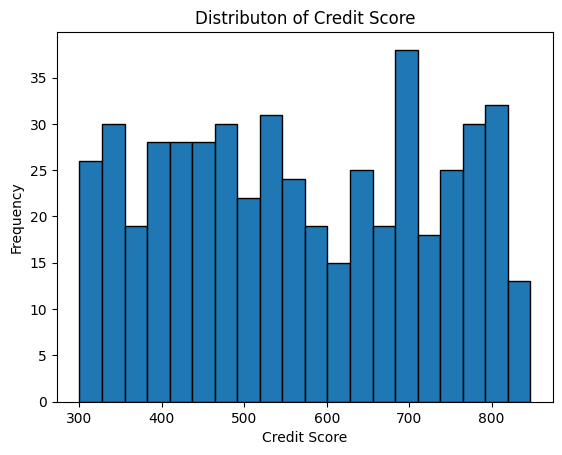

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
credit_score = df["Credit_Score"]
plt.hist(credit_score, bins=20, edgecolor='k')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distributon of Credit Score')
plt.show()

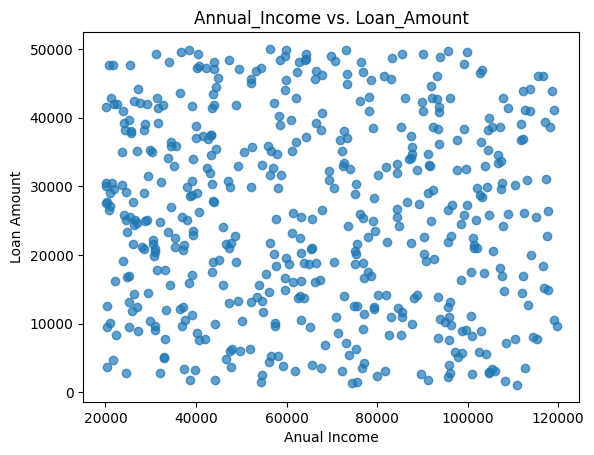

In [13]:
annual_income = df["Annual_Income"]
loan_amnt = df["Loan_Amount"]
plt.scatter(annual_income, loan_amnt, alpha=0.7)
plt.xlabel('Anual Income')
plt.ylabel('Loan Amount')
plt.title('Annual_Income vs. Loan_Amount')
plt.show()

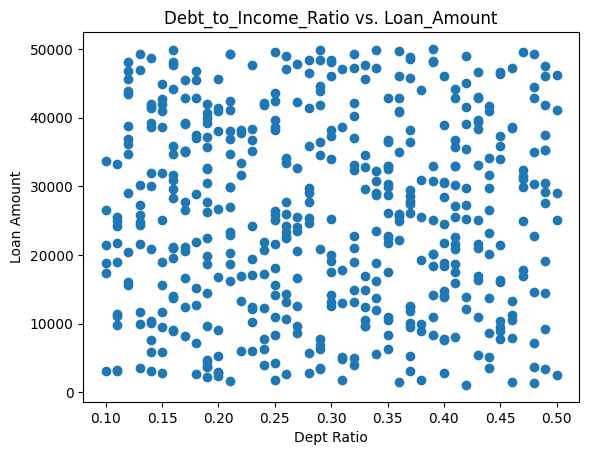

In [14]:
debt_ratio = df["Debt_to_Income_Ratio"]
plt.scatter(debt_ratio, loan_amnt)
plt.xlabel('Dept Ratio')
plt.ylabel('Loan Amount')
plt.title('Debt_to_Income_Ratio vs. Loan_Amount')
plt.show()

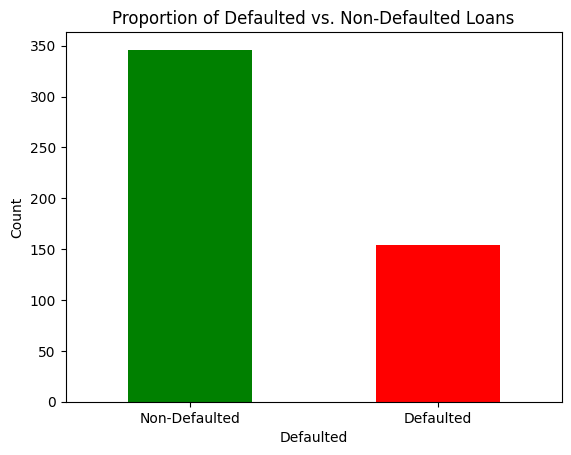

In [30]:
# notice that here we are using the plot() function directly from pandas - this is acceptable, and just be aware this is possible to do and you ont nede to use plt all the time
df['Defaulted'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Proportion of Defaulted vs. Non-Defaulted Loans')
plt.xticks([0, 1], ['Non-Defaulted', 'Defaulted'], rotation=0)
plt.ylabel('Count')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Logistic regression = CLASIFICATION, we are clasifying the people that will default on their loans (defaulted or not)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

scaler = MinMaxScaler()
# normalizing the data - the idea is to treat data as ratios relative to the higest value in that column
# we get back ratio for each column, so that the model does not treat one columnas being more significant
# just because one column has higher numerical values
df[['Credit_Score', 'Annual_Income', 'Loan_Amount']] = scaler.fit_transform(df[['Credit_Score', 'Annual_Income', 'Loan_Amount']])

X = df.drop('Defaulted', axis=1)
y = df['Defaulted']

# notice that we are returning x_train, x_test and then y_train and y_test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

print("Training set size:", x_train.shape)
print("Test set size:", x_test.shape)

# TRAINING
# creating and training the model - model.fit() => means training
model = LogisticRegression()
model.fit(x_train, y_train)

# TESTING
# recall: only show the model the test set ONLY at inference, otherwise you skew your model.
# here we do inference and test the prediction of the model on the TEST set.
y_pred = model.predict(x_test)

# EVALUATING
# using the metricts to evaluate how the model performed - this is simple just use
# whatever metric you want, and then pass the prediction, and the actual results.
conf_mtrx = confusion_matrix(y_pred, y_test)
accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)

print("Confusion Matrix:")
print(conf_mtrx)
print(f"Accuracy: {accuracy:.2f}")

# We are evaluating based on Type 1 error (FP)
print(f"Precision: {precision:.2f}")

# We are evaluating based on Type 2 error (FN)
print(f"Recall: {recall:.2f}")

# feature importance
feature_importance = pd.DataFrame({
 'Feature': x_train.columns,
 'Coefficient': model.coef_[0]
})

# model.coef_[0] is what gives you the importance coefficient - highly positive = high correlation
# highly negative = high inverse correlation
feature_importance.sort_values(by='Coefficient', key=abs,
ascending=False, inplace=True)
print(feature_importance)


Training set size: (400, 6)
Test set size: (100, 6)
Confusion Matrix:
[[17  7]
 [ 8 68]]
Accuracy: 0.85
Precision: 0.91
Recall: 0.89
                Feature  Coefficient
0          Credit_Score    -6.072208
4  Debt_to_Income_Ratio     2.746873
1         Annual_Income    -1.807160
2           Loan_Amount     0.262664
3             Loan_Term    -0.006507
5                   Age    -0.003050
